<h2> Nauczanie maszynowe/Ćwiczenia10

<h3> Podejście Bayesa

- szybki
- prosty
- łatwy w interpretacji
- mało (o ile) hiperparametrów

To co nas interesuje to oszacowanie prawdopodobieństwa kategorii $L$ na podstawie zestawu cech $(X_1,X_2...,X_n)$. Korzystamy przy tym z twierdzenia Bayesa.
<center> $P(L|X_1,X_2,...,X_n) = \frac{P(X_1,X_2,...,X_n|L)P(L)}{P(X_1,X_2,...,X_n}$ </center>
    
Im większe prawdopodobieństwo, tym bardziej skłaniamy się ku kategorii. Dla przykładu, jeżeli rozważamy kategorie $L_1$ oraz $L_2$ to badając stosunek <br> <br>
<center> $\frac{P(L_1|X_1,X_2,...,X_n)}{P(L_2|X_1,X_2,...,X_n)}$ </center>

możemy stwierdzić, która kategoria jest bardziej prawdopodobna. Z pierwszego równania mamy <br> <br>

<center> $\frac{P(L_1|X_1,X_2,...,X_n)}{P(L_2|X_1,X_2,...,X_n)} = \frac{P(X_1,X_2,...,X_n|L_1)P(L_1)}{P(X_1,X_2,...,X_n|L_2)P(L_2)}$ </center>

Na podstawie danych oszacowujemy prawdopodobieństwa $P(X_1,X_2,...,X_n|L_i)$ oraz $P(L_i)$. W ten sposób tworzony jest model generatywny - określony jest hipotetyczny losowy proces który generuje dane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

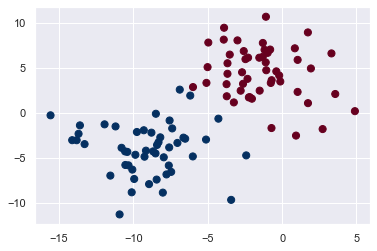

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers = 2, random_state = 1, cluster_std = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu")
plt.show()

Rozkład normalny

In [3]:
from sklearn.naive_bayes import GaussianNB #zakladamy normalną postac do oszacowania P(X1,...,Xn |L)

model = GaussianNB()
model.fit(X, y);

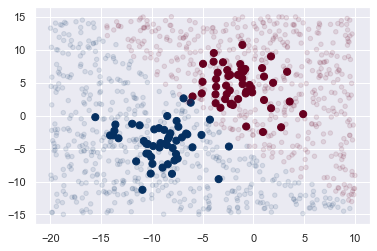

In [4]:
#genrujemy losowe dane zeby zobaczyc jak radzi sobie z nimmi nasz model
rng = np.random.RandomState(0)
Xnew = [-20, -15] + [30, 30] * rng.rand(1000, 2)
y_predicted = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c = y, s=50, cmap = "RdBu")
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = y_predicted, s = 20, cmap = "RdBu", alpha =0.1)
plt.show()

In [5]:
#mozemmy tez przewidywac prawdopdobienstwa kategorii

model.predict_proba([[-10,5]])

array([[0.20992536, 0.79007464]])

Rozkład wielomianowy

In [6]:
from sklearn.naive_bayes import MultinomialNB #zakladamy rozklad wielomianowy (dobrze sie nadaje do cech okreslających zliczenia)

In [7]:
from sklearn.datasets import fetch_20newsgroups #zawiera 18 tys postow na 20 tematow (chwile sie laduje)

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
categories = ["sci.med", "sci.space", "comp.windows.x"] #wybieram 3 przykladowe kategorie
train = fetch_20newsgroups(subset = "train", categories = categories)
test = fetch_20newsgroups(subset = "test", categories = categories)

In [9]:
print(len(train.data), len(test.data))

1780 1185


In [10]:
train.target_names #kategorie

['comp.windows.x', 'sci.med', 'sci.space']

In [11]:
print(train.data[0])

From: jra@wti.com (Jim Atkinson)
Subject: How can I detect local vs remote DISPLAY settings?
Reply-To: jra@wti.com
Organization: Wavefront Technologies Inc, Santa Barbara, CA
Lines: 17
Nntp-Posting-Host: barracuda.wti.com
X-Disclaimer: Not a spokesperson for Wavefront Technologies, Inc.

I am trying to find out if my application is running on a local or a
remote display.  A local display being connected to the same system
that the client is executing on.  I have access to the display string
but can I tell from the string?

If the client is executing on host foo then ":0", "unix:0", "foo:0",
and "localhost:0" are all local.  Under Ultrix, I believe that
"local:0" is also a valid display name (a shared memory connection
maybe?).  Are there other strings that I should check for?  Is there a
better way to detect this?

Thank you for any help you can give me.
-- 
Jim Atkinson		Wavefront Technologies, Inc.
jra@wti.com		What, me?  A company spokesperson?  Get real!
=================== Life is

In [12]:
#oczywiscie do analizy nalezy przeksztalcic tekst na liczby --> wiele innych metod na NLP

from sklearn.feature_extraction.text import TfidfVectorizer #uzyjemy metody TF-IDF

In [13]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [14]:
model.fit(train.data, train.target)
categories_predicted = model.predict(test.data)

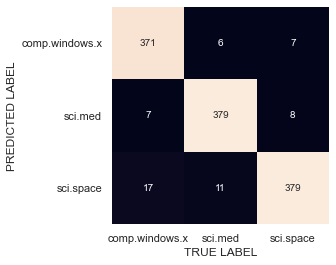

In [15]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, categories_predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, 
            xticklabels = train.target_names, yticklabels=train.target_names)

plt.xlabel("TRUE LABEL")
plt.ylabel("PREDICTED LABEL")
plt.show()

In [16]:
#chcemy przewidziec nowe zdanie

s = "black hole is a misterious object"
model.predict([s])

array([2], dtype=int64)

<h3> Sieci Bayesa

<h4> Sieci Bayesowskie </h4>


- przyjmują postać skierowanego (krawędzie skierowane są w jednym kierunku), acyklicznego (brak cyklów) grafu (DAG=directd acyclic graph)
- wygodne do modelowania zależności przyczynowo-skutkowych

Wyróżniamy tutaj
- wierzchołki (zmienne)
- krawędzie (zależności pomiędzy zmiennymi; skierowane)

Nazewnictwo: Jeżeli A -> B, to A nazywamy rodzicem (poprzednikiem) B, a B nazywamy potomkiem (następnikiem) węzła A.

Każda zmienna (reprezentowana przez wierzchołek) jest warunkowo niezależna od zmiennych reprezentowanych przez wierzchołki, które nie są potomkami w sieci dla danego poprzednika. Mamy


$P(X_1=x_1,X_2=x_2,....) = \prod_i P(X_i=x_i|rodzice(X_i))$

<h4> Przykład (od Judea Pearl) </h4>

- Właściciel domu pracuje w znacznej odległości od niego.
- Zainstalowano alarm, który ma przeciwdziałać włamaniom. Niestety, również trzęsienia ziemi potrafią spowodować uruchomienie alarmu.
- Sąsiedzi - John oraz Mary dzwonią do właściciela domu gdy usłyszą alarm (z pewnym prawdopodobieństwem).

Poniżej przedstawiono schemat tej sytuacji:

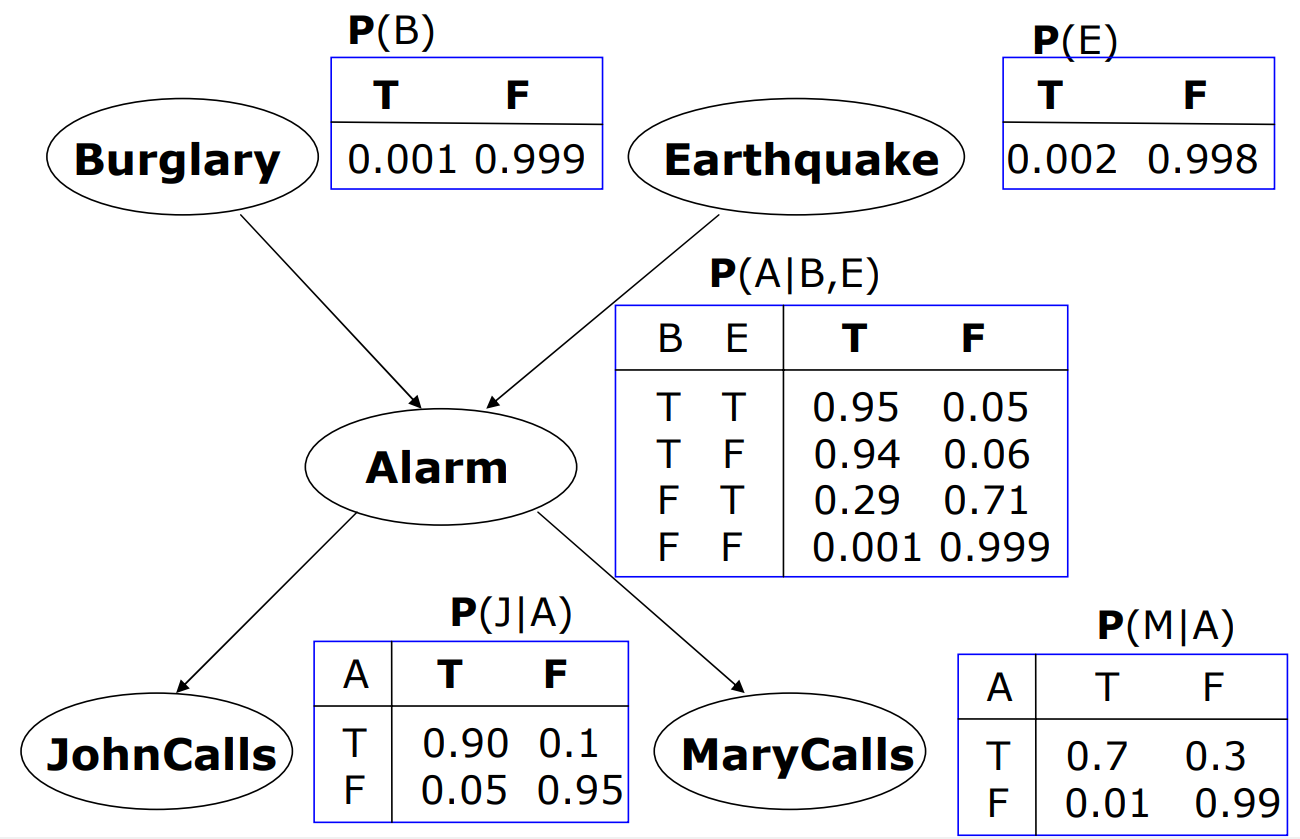

In [17]:
from IPython import display
display.Image("nb.png", width="500", height="500")

<h4> Zadanie1: Oblicz $P(B=T, E=T, A=T, J=T, M=F)$

<h4> Zadanie2: (oszędność parametrów):
    
- Ile potrzeba parametrów aby opisać rozkład łączny 5 zmiennych binarnych? 
- Ile parametrów ma powyższa sieć? 

<h4> Zadanie3: Wykonaj analogiczne zadanie dla 10 zmiennych binarnych i następującej topologii sieci:

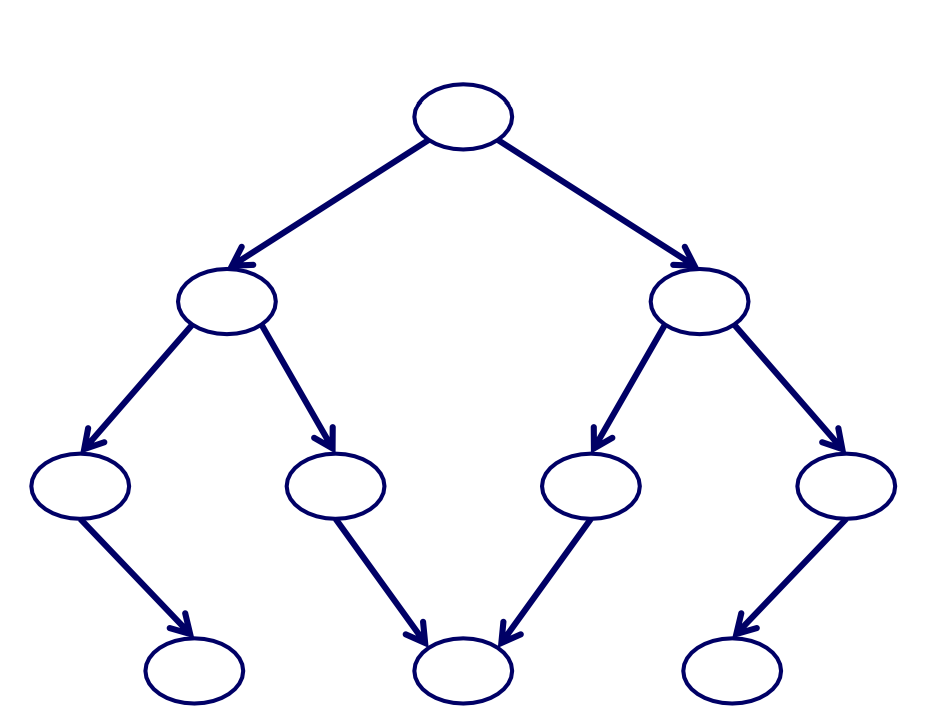

In [18]:
display.Image("nb2.png", width="500", height="500")

A teraz parę przykładów w Python

In [19]:
import pandas as pd

In [20]:
import pandas as pd
data = pd.read_csv('bn_data.csv')
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


In [21]:
from pgmpy.models import BayesianNetwork

nb_net = BayesianNetwork([('fruit', 'tasty'), ('size', 'tasty')])  #tworzymy siec z zaleznosciami: fruit -> tasty oraz size->tasty

In [22]:
#proste zliczenia

from pgmpy.estimators import ParameterEstimator

p = ParameterEstimator(nb_net, data)

print(p.state_counts('fruit'))
print()
print(p.state_counts('size'))
print()
print(p.state_counts('tasty'))

        fruit
apple       7
banana      7

       size
large    10
small     4

fruit apple       banana      
size  large small  large small
tasty                         
no      1.0   1.0    1.0   1.0
yes     3.0   2.0    5.0   0.0


In [23]:
from pgmpy.estimators import MaximumLikelihoodEstimator

mle_model = MaximumLikelihoodEstimator(nb_net, data) #szacowanie prawdopodobienstw za pomocą metody największej wiarygodnosci
print(mle_model.estimate_cpd('fruit'))  
print(mle_model.estimate_cpd('size')) 
print(mle_model.estimate_cpd('tasty'))  

+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+-------------+----------+
| size(large) | 0.714286 |
+-------------+----------+
| size(small) | 0.285714 |
+-------------+----------+
+------------+--------------+--------------------+---------------------+---------------+
| fruit      | fruit(apple) | fruit(apple)       | fruit(banana)       | fruit(banana) |
+------------+--------------+--------------------+---------------------+---------------+
| size       | size(large)  | size(small)        | size(large)         | size(small)   |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(no)  | 0.25         | 0.3333333333333333 | 0.16666666666666666 | 1.0           |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(yes) | 0.75         | 0.6666666666666666 | 0.8333333333333334  | 0.0           |
+------------+--------------+----

In [24]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='K2')) #dodaje pseudozliczenia (1) zeby m.in. wyeliminowac zera

+------------+--------------------+--------------+---------------+--------------------+
| fruit      | fruit(apple)       | fruit(apple) | fruit(banana) | fruit(banana)      |
+------------+--------------------+--------------+---------------+--------------------+
| size       | size(large)        | size(small)  | size(large)   | size(small)        |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(no)  | 0.3333333333333333 | 0.4          | 0.25          | 0.6666666666666666 |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(yes) | 0.6666666666666666 | 0.6          | 0.75          | 0.3333333333333333 |
+------------+--------------------+--------------+---------------+--------------------+


<h4> Zadanie4: Wyjaśnij wartość 0.75 w powyższej tabeli (poprzez bezpośrednie wyliczenie i objaśnienie).

In [25]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='BDeu', equivalent_sample_size=10)) #inna metoda; BDeu = Bayesian Dirichlet equivalent uniform prior

+------------+---------------------+--------------------+--------------------+---------------------+
| fruit      | fruit(apple)        | fruit(apple)       | fruit(banana)      | fruit(banana)       |
+------------+---------------------+--------------------+--------------------+---------------------+
| size       | size(large)         | size(small)        | size(large)        | size(small)         |
+------------+---------------------+--------------------+--------------------+---------------------+
| tasty(no)  | 0.34615384615384615 | 0.4090909090909091 | 0.2647058823529412 | 0.6428571428571429  |
+------------+---------------------+--------------------+--------------------+---------------------+
| tasty(yes) | 0.6538461538461539  | 0.5909090909090909 | 0.7352941176470589 | 0.35714285714285715 |
+------------+---------------------+--------------------+--------------------+---------------------+


Przykład

In [26]:
data = pd.DataFrame(np.random.randint(low=0, high=2, size=(5000, 4)), columns=['A', 'B', 'C', 'D'])
model = BayesianNetwork([('A', 'B'), ('A', 'C'), ('D', 'C'), ('B', 'D')])

model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") #domyslnie  equivalent_sample_size=5
for cpd in model.get_cpds():
    print(cpd)

+------+----------+
| A(0) | 0.493806 |
+------+----------+
| A(1) | 0.506194 |
+------+----------+
+------+---------------------+--------------------+
| A    | A(0)                | A(1)               |
+------+---------------------+--------------------+
| B(0) | 0.5115314586283634  | 0.5037497533057036 |
+------+---------------------+--------------------+
| B(1) | 0.48846854137163664 | 0.4962502466942964 |
+------+---------------------+--------------------+
+------+--------------------+--------------------+--------------------+---------------------+
| A    | A(0)               | A(0)               | A(1)               | A(1)                |
+------+--------------------+--------------------+--------------------+---------------------+
| D    | D(0)               | D(1)               | D(0)               | D(1)                |
+------+--------------------+--------------------+--------------------+---------------------+
| C(0) | 0.5019805902158844 | 0.4842877816828613 | 0.5089268387347

Ocena modelu

In [27]:
from pgmpy.estimators import BDeuScore, K2Score, BicScore

bdeu = BDeuScore(data)
k2 = K2Score(data)
bic = BicScore(data)

#im lepszy model tym większa wartosc tych wspolczynnikow
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))

-13886.838472715515
-13890.386570899245
-13896.571866273607


<h4> Zadanie5: Wygeneruj dane zawierające 10 tys wierszy i 3 kolumny. Pierwsze dwie kolumny (A, B) niech zawierają losowe liczby całkowite z zakresu $<-2,2>$. Trzecia kolumna (C) to kombinacja liniowa dwóch pierwszych kolumn $C = 2A-3B$. Zbuduj dwie topologie sieci, tzn. $(A ->C, B->C)$ oraz $(A->B, B->C)$. Oceń która z sieci wydaje sie lepiej odzwierciedlać strukturę danych. Wyjaśnij dlaczego.

<h4> Szukanie topologii sieci - trudne (problem NP)

1) Brutalna siła (ExhaustiveSearch)

2) Algorytm zachłanny (HillClimbSearch)

3) Zlokalizuj zmienne niezależne (np test chi2) - to ograniczy liczbę możliwości (ConstraintBasedEstimator)

4) Algorytm MMHC - kombinacja 2 i 3 oraz jeszcze pare niuansów

In [47]:
data = pd.DataFrame(np.random.randint(-2, 2, size=(10000, 2)), columns=list('AB'))
data['C'] = data['A'] + data['B']

data.head()

,A,B,C
0,0,0,0
1,1,1,2
2,1,1,2
3,-1,1,0
4,0,-1,-1


In [48]:
from pgmpy.estimators import ExhaustiveSearch
bic = BicScore(data)
es = ExhaustiveSearch(data, scoring_method=bic)
best_model = es.estimate()
print("Siec z najwyzszym BIC")
print(best_model.edges())

print()
print("BIC/Siec")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

Siec z najwyzszym BIC
[('A', 'C'), ('B', 'C')]

BIC/Siec
-28193.76264181942 [('A', 'C'), ('B', 'C')]
-28233.131325916438 [('A', 'B'), ('A', 'C'), ('C', 'B')]
-28233.13132591644 [('B', 'A'), ('C', 'A'), ('C', 'B')]
-28233.13132591644 [('B', 'C'), ('B', 'A'), ('C', 'A')]
-28233.13132591644 [('A', 'C'), ('B', 'C'), ('B', 'A')]
-28233.13132591644 [('A', 'B'), ('C', 'A'), ('C', 'B')]
-28233.13132591644 [('A', 'B'), ('A', 'C'), ('B', 'C')]
-32676.26342209283 [('A', 'B'), ('C', 'B')]
-32676.532695382688 [('B', 'A'), ('C', 'A')]
-37278.8634494544 [('C', 'A'), ('C', 'B')]
-37278.8634494544 [('B', 'C'), ('C', 'A')]
-37278.8634494544 [('A', 'C'), ('C', 'B')]
-41721.995545630794 [('C', 'B')]
-41721.995545630794 [('B', 'C')]
-41722.26481892065 [('C', 'A')]
-41722.26481892065 [('A', 'C')]
-41761.36422972781 [('B', 'A'), ('C', 'B')]
-41761.36422972781 [('B', 'C'), ('B', 'A')]
-41761.36422972781 [('A', 'B'), ('B', 'C')]
-41761.63350301767 [('A', 'C'), ('B', 'A')]
-41761.63350301767 [('A', 'B'), ('C', 

In [49]:
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))
print(best_model.edges())


[('A', 'C'), ('B', 'C')]


<h4> Zadanie6: Liczba możliwych topologii sieci dla $n$ cech wyraża się następującyc wzorem rekurencyjnym
   

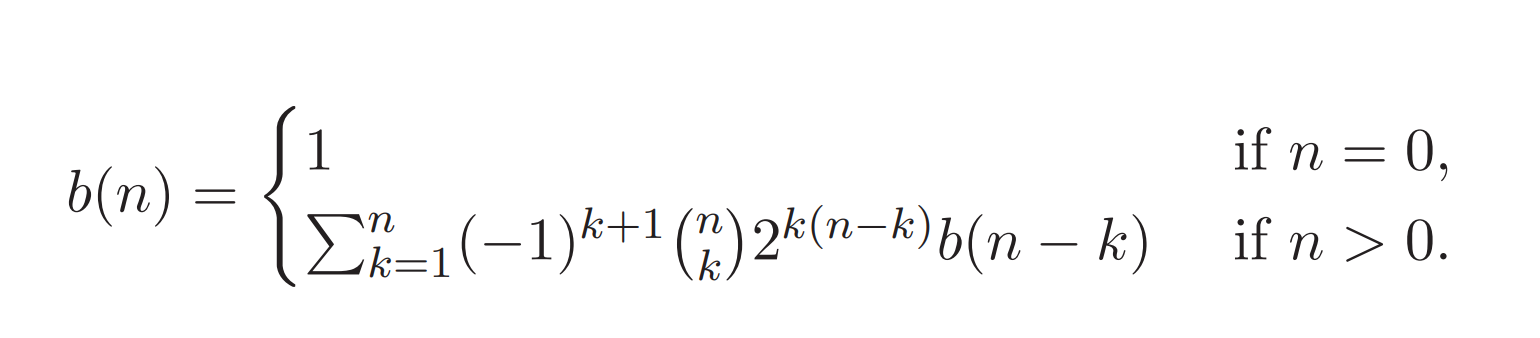

In [39]:
display.Image("bay.png", width="500", height="500")

<h4> Zaimplementuj ten wzór oraz sprawdź go dla 3 cech (przyklad wyżej). Ile możliwych sieci występuje dla 10 cech?

Sieci Bayesa opracowano na podstawie:
- https://notebook.community/pgmpy/pgmpy_notebook/notebooks/9.%20Learning%20Bayesian%20Networks%20from%20Data

Do poczytania:

- https://www.frontiersin.org/articles/10.3389/fgene.2019.01196/full
- https://biodatamining.biomedcentral.com/articles/10.1186/1756-0381-6-6
- https://www.nature.com/articles/s42003-022-03243-w